# **<div style="text-align: center"> Finding Optimal Location for Auto Mechanic Shop in State of Maryland </div>**

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project our goal is to find most favorable location for a car mechanic shop in Maryland, USA. This report will be compatible with shareholders' needs.

In accordance with shareholders request, we will find the best location which will be close to close to cities but not close range to any of competition. Using data science methodology and instruments such as data analysis and visualization, this project aims to provide optimal location.
Thus, we will compare Foursquare data to registered passenger vehicle data.

We will use our data science powers to generate a few most promising neighborhoods based on these criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on our business problem we will need:

* Passenger vehicle numbers in each city/county
* Geolocation coordinates of each city/county
* Number of existing mechanic shops in each city/county

Therefore, this project uses two main sources of data. Our crucial data is registered passenger vehicles in Maryland, USA. This data can be retrieved from State of Maryland's open data source - https://opendata.maryland.gov/w/kqkd-4fx8/gz96-f9ea?cur=7U4SpQ1_sHa
This data gives us important information on vehicle number from 2010 to 2020 in each county of Maryland. Even so, this data requires data cleaning, and wrangling. 

To obtain geolocation, we will use Python's Geocoder package. 
Finally, we will use Foursquare API to obtain number of existing mechanics in each county with their names as well. Then, this information will be visualized on Python's Folium package map.

## Methodology <a name="methodology"></a>

* Firstly, our data will be retrieved from State of Maryland's open data source - https://opendata.maryland.gov/w/kqkd-4fx8/gz96-f9ea?cur=7U4SpQ1_sHa
For us to use this data, it will be cleaned and wrangled.
* Foursquare will be used to determine number of shops as well as their geolocations and names.
* Mechanic shops and vehicle numbers will be combined into one dataframe.
***

Let's startting with importing all necessary libraries we will use on this project.

In [1]:
import pandas as pd
import numpy as np

import requests

import json
from pandas.io.json import json_normalize

import folium
from folium import plugins
from geopy.geocoders import Nominatim
from geopy import geocoders

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

import io 
from PIL import Image # saving folium map as an image

print("All requested libraries imported")

All requested libraries imported


Load our data and put into a dataframe.

In [2]:
url= 'https://opendata.maryland.gov/api/views/kqkd-4fx8/rows.csv?accessType=DOWNLOAD'
df_md = pd.read_csv(url)
df_md

,Fiscal Year,ALLEGANY,ANNE ARUNDEL,BALTIMORE,BALTIMORE CITY,CALVERT,CAROLINE,CARROLL,CECIL,CHARLES,...,KENT,MONTGOMERY,PRINCE GEORGE'S,QUEEN ANNE'S,SOMERSET,ST MARY'S,TALBOT,WASHINGTON,WICOMICO,WORCESTER
0,FY 2010,62813,513278,660553,280793,91108,36699,176842,94305,138672,...,21453,754641,626009,53779,20570,104488,42116,136894,86553,57117
1,FY 2011,62512,533106,663514,285394,91768,36667,177125,94563,140423,...,21397,752503,633920,53938,20382,105942,42380,137204,88153,56627
2,FY 2012,62574,537670,669052,289229,93222,36728,177603,95254,141965,...,21651,755353,643710,54159,20021,108276,42344,137716,87294,57767
3,FY 2013,61390,538501,669201,297990,92699,35749,176281,93408,141107,...,21191,758413,640226,53259,19495,107802,41680,135787,86735,56148
4,FY 2014,61481,542768,680074,303542,93322,36019,178086,94146,143729,...,21397,763346,653111,53842,20125,108794,42110,137007,87766,56655
5,FY 2015,61522,548755,692233,309611,94446,36356,179479,95147,146350,...,21543,774968,673476,54480,21721,108860,42488,137203,89182,57230
6,FY 2016,61345,552968,701014,293270,95636,36986,179561,95495,148272,...,21221,787453,685700,55564,19388,112179,42907,138494,88464,59393
7,FY 2017,61917,562327,687992,293487,96383,36795,183558,96398,150352,...,21751,800392,696608,56297,20179,113227,43207,141919,90719,58030
8,FY 2018,61180,567843,689814,294465,97348,37521,185135,97365,153349,...,21778,807040,705861,58134,20354,114552,43298,141244,92388,58867
9,FY 2019,60888,576194,688051,309996,97745,37958,185002,98044,154789,...,21997,807146,714429,57619,20418,115280,43523,141527,93479,59145


***
We would like out data to be showing the fiscal years as columns and counties as rows. So, Let's transpose our data, then reset indexes.

In [3]:
df_md = df_md.transpose().reset_index().rename(columns={'index':'COUNTRY'})
df_md.head()

,COUNTRY,0,1,2,3,4,5,6,7,8,9,10
0,Fiscal Year,FY 2010,FY 2011,FY 2012,FY 2013,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020
1,ALLEGANY,62813,62512,62574,61390,61481,61522,61345,61917,61180,60888,60551
2,ANNE ARUNDEL,513278,533106,537670,538501,542768,548755,552968,562327,567843,576194,586982
3,BALTIMORE,660553,663514,669052,669201,680074,692233,701014,687992,689814,688051,691845
4,BALTIMORE CITY,280793,285394,289229,297990,303542,309611,293270,293487,294465,309996,292633


Dropping column indexes and rename columns as desired.

In [4]:
df_md = df_md.drop(df_md.index[0])
df_md.columns = ['COUNTY', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
df_md.insert(1, 'STATE', 'MD')
df_md.head()

,COUNTY,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,ALLEGANY,MD,62813,62512,62574,61390,61481,61522,61345,61917,61180,60888,60551
2,ANNE ARUNDEL,MD,513278,533106,537670,538501,542768,548755,552968,562327,567843,576194,586982
3,BALTIMORE,MD,660553,663514,669052,669201,680074,692233,701014,687992,689814,688051,691845
4,BALTIMORE CITY,MD,280793,285394,289229,297990,303542,309611,293270,293487,294465,309996,292633
5,CALVERT,MD,91108,91768,93222,92699,93322,94446,95636,96383,97348,97745,98349


There is a slight problem in our data which when we require geolocation given each county, St. Mary's comes up as an Ireland county. That's because the Geopy package only finds St Mary's as a St Mary's City. So, let's rename that row.

In [5]:
df_md['COUNTY'] = df_md['COUNTY'].replace(["ST MARY'S"], "ST MARY'S CITY")
df_md.tail()

,COUNTY,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
20,ST MARY'S CITY,MD,104488,105942,108276,107802,108794,108860,112179,113227,114552,115280,116160
21,TALBOT,MD,42116,42380,42344,41680,42110,42488,42907,43207,43298,43523,44642
22,WASHINGTON,MD,136894,137204,137716,135787,137007,137203,138494,141919,141244,141527,142199
23,WICOMICO,MD,86553,88153,87294,86735,87766,89182,88464,90719,92388,93479,95023
24,WORCESTER,MD,57117,56627,57767,56148,56655,57230,59393,58030,58867,59145,59729


Our data looks good. <br>
Now, using Geocode, we can get each county's geolocation. For this, we can create a code that loops on our dataframe and insert each given geolocation into related row.

In [6]:
list_lat = []
list_long = []


for index, row in df_md.iterrows():
    County = row['COUNTY']
    State = row['STATE']       
    query = str(County)+','+str(State)

    geolocator = Nominatim(user_agent='foursquare_agent')
    location = geolocator.geocode(query)   
    
    list_lat.append(location.latitude)
    list_long.append(location.longitude)


df_md['COUNTY LATITUDE'] = list_lat   
df_md['COUNTY LONGITUDE'] = list_long
df_md.head()

,COUNTY,STATE,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,COUNTY LATITUDE,COUNTY LONGITUDE
1,ALLEGANY,MD,62813,62512,62574,61390,61481,61522,61345,61917,61180,60888,60551,39.657245,-78.655063
2,ANNE ARUNDEL,MD,513278,533106,537670,538501,542768,548755,552968,562327,567843,576194,586982,39.049347,-76.512884
3,BALTIMORE,MD,660553,663514,669052,669201,680074,692233,701014,687992,689814,688051,691845,39.290882,-76.610759
4,BALTIMORE CITY,MD,280793,285394,289229,297990,303542,309611,293270,293487,294465,309996,292633,39.265954,-76.635278
5,CALVERT,MD,91108,91768,93222,92699,93322,94446,95636,96383,97348,97745,98349,39.700388,-75.982445


Now, let's obtain mechanic shop names with their geolocations using Foursquare API. <br>
Define our Foursquare creditendials first.

In [7]:
ACCESS_TOKEN = 'RVRZKQZQA5Q0OLYL1VFDU4RROPELYOZ3LULJN5MLGHIZ3TNO'
CLIENT_ID = 'UU1G14RDJWXISMZOA1TM2WZRN1OWWAIIKGAHANSEJNGRP4J2'
CLIENT_SECRET = 'EDMQUKDAEFRG1TGT0ANGOSVXCV3BXHD2DPAYLAFKFCQSKVPI'
VERSION = '20180605'
LIMIT = 150

Creating a function that gets mechanic shops names and geolocation. <br>
We limit the result 10 miles - approximately 16.000 km - and maximum of 150 shops from each county's center.

In [8]:
search_query = 'Auto-Mechanic'

def getNearbyVenues(names, latitudes, longitudes, radius=16000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
        CLIENT_SECRET, lat, lng,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
        url
            
        # make the GET request
        results = requests.get(url).json()
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results['response']['venues']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['COUNTY', 
                  'COUNTY LATITUDE', 
                  'COUNTY LONGITUDE', 
                  'MECHANIC SHOP NAME', 
                  'MECHANIC SHOP LATITUDE', 
                  'MECHANIC SHOP LONGITUDE']
    
    return(nearby_venues)

Creating a code that runs getNearbyVenues function on each county and putting the results into a new dataframe.

In [9]:
maryland_mechanic = getNearbyVenues(names=df_md['COUNTY'],
                                   latitudes=df_md['COUNTY LATITUDE'],
                                   longitudes=df_md['COUNTY LONGITUDE']
                                  )

ALLEGANY
ANNE ARUNDEL
BALTIMORE
BALTIMORE CITY
CALVERT
CAROLINE
CARROLL
CECIL
CHARLES
DORCHESTER
FREDERICK
GARRETT
HARFORD
HOWARD
KENT
MONTGOMERY
PRINCE GEORGE'S
QUEEN ANNE'S
SOMERSET
ST MARY'S CITY
TALBOT 
WASHINGTON
WICOMICO
WORCESTER


In [10]:
print(maryland_mechanic.shape)
maryland_mechanic.head()

(1029, 6)


,COUNTY,COUNTY LATITUDE,COUNTY LONGITUDE,MECHANIC SHOP NAME,MECHANIC SHOP LATITUDE,MECHANIC SHOP LONGITUDE
0,ALLEGANY,39.657245,-78.655063,Twigg's Auto,39.679403,-78.701791
1,ALLEGANY,39.657245,-78.655063,Rockys Auto,39.642461,-78.714635
2,ALLEGANY,39.657245,-78.655063,Automotive Specialties,39.627240,-78.768207
3,ALLEGANY,39.657245,-78.655063,Miller's Auto Parts,39.675658,-78.730790
4,ALLEGANY,39.657245,-78.655063,AutoZone,39.647768,-78.757856


We found total of 892 mechanic shops all combined counties. <br>
Now, let's group the dataframe by county and see how many shops are there in each county.

In [11]:
df_mec = maryland_mechanic.groupby('COUNTY').count()
df_mec

,COUNTY LATITUDE,COUNTY LONGITUDE,MECHANIC SHOP NAME,MECHANIC SHOP LATITUDE,MECHANIC SHOP LONGITUDE
COUNTY,,,,,
ALLEGANY,45,45,45,45,45
ANNE ARUNDEL,50,50,50,50,50
BALTIMORE,50,50,50,50,50
BALTIMORE CITY,50,50,50,50,50
CALVERT,50,50,50,50,50
CAROLINE,50,50,50,50,50
CARROLL,50,50,50,50,50
CECIL,35,35,35,35,35
CHARLES,50,50,50,50,50


So far, we have gathered all the data we need. We're now ready to use this data for analysis to produce the report on optimal locations for a new mechanic shop.

## Analysis <a name="analysis"></a>

Let's start with combining df_md and df_mec. In df_mec, we will take 'Mechanic Shop Name' column, rename it as 'Number of Mechanics' then combine with df_md then create a new dataframe.

In [12]:
df_combined = df_md.loc[:, ['COUNTY', 'COUNTY LATITUDE', 'COUNTY LONGITUDE', '2020']]
df_combined['MECHANIC SHOP NAME'] = df_mec.loc[:, 'MECHANIC SHOP NAME'].values
df_combined.rename({'MECHANIC SHOP NAME': 'NUMBER OF MECHANICS'}, axis=1, inplace=True)
df_combined.head()

,COUNTY,COUNTY LATITUDE,COUNTY LONGITUDE,2020,NUMBER OF MECHANICS
1,ALLEGANY,39.657245,-78.655063,60551,45
2,ANNE ARUNDEL,39.049347,-76.512884,586982,50
3,BALTIMORE,39.290882,-76.610759,691845,50
4,BALTIMORE CITY,39.265954,-76.635278,292633,50
5,CALVERT,39.700388,-75.982445,98349,50


For better understanding, let's plot our one of crucial data 

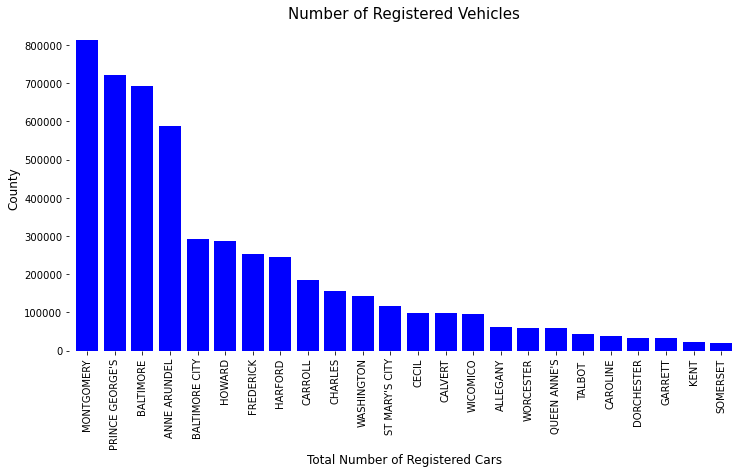

In [13]:
df_sorted = df_combined.sort_values('2020', ascending=False)
df_sorted.set_index('COUNTY', inplace=True)
df_sorted['2020'].plot(kind='bar', figsize=(12, 6), width=0.8, color='blue')
plt.style.use('fivethirtyeight')
plt.box(False)
plt.title('Number of Registered Vehicles', fontsize=15)
plt.xlabel('Total Number of Registered Cars', fontsize = 12)
plt.ylabel('County', fontsize=12)
plt.savefig('Registered_Vehicles.png', dpi=300, bbox_inches='tight')
plt.show()

Now, in order to understand more about each county's connection between car numbers and mechanic number, we can get a ratio between these two. This will show us, how many cars per one mechanics. 

Let's create a loop function for that.

In [14]:
for i in range(1, 25):
    df_combined['RATIO'] = df_combined['2020'] / df_combined['NUMBER OF MECHANICS']
df_combined

,COUNTY,COUNTY LATITUDE,COUNTY LONGITUDE,2020,NUMBER OF MECHANICS,RATIO
1,ALLEGANY,39.657245,-78.655063,60551,45,1345.58
2,ANNE ARUNDEL,39.049347,-76.512884,586982,50,11739.6
3,BALTIMORE,39.290882,-76.610759,691845,50,13836.9
4,BALTIMORE CITY,39.265954,-76.635278,292633,50,5852.66
5,CALVERT,39.700388,-75.982445,98349,50,1966.98
6,CAROLINE,34.791269,-82.282715,38335,50,766.7
7,CARROLL,39.635774,-75.806001,185749,50,3714.98
8,CECIL,38.705311,-76.532315,98524,35,2814.97
9,CHARLES,38.371881,-75.589176,156153,50,3123.06
10,DORCHESTER,39.332102,-76.686443,33638,50,672.76


Let's show all these shops in a map.

In [15]:
# Geological coordinates of Maryland, MD
latitude_md = 39.045753
longitude_md = -76.641273

In [ ]:
# Loop through each shop's geological coordinates

mechanic_md_map = folium.Map(location=[latitude_md, longitude_md], zoom_start=8)

for lat, lng, label in zip(maryland_mechanic['MECHANIC SHOP LATITUDE'], maryland_mechanic['MECHANIC SHOP LONGITUDE'],
                           maryland_mechanic['MECHANIC SHOP NAME']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mechanic_md_map)

img_data = mechanic_md_map._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('Mechanics_in_MD.png')

mechanic_md_map

And show the shops in cluster.

In [ ]:
mec_md_map_cluster = folium.Map(location = [latitude_md, longitude_md], zoom_start = 8)

mechanic = plugins.MarkerCluster().add_to(mec_md_map_cluster)

# Loop through each shop's geological coordinates and add each data point to the mark cluster
for lat, lng, label, in zip(maryland_mechanic['MECHANIC SHOP LATITUDE'], maryland_mechanic['MECHANIC SHOP LONGITUDE'],
                            maryland_mechanic['MECHANIC SHOP NAME']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(mechanic)

# display map
mec_md_map_cluster

Now, let's show this ratio in bar chart with number of cars. <br>
There is a wide range values between these two values. So, we will use log scale bar chart to see the relation between these two values.

In [ ]:
df_sorted1 = df_combined.sort_values('RATIO', ascending=False)
df_sorted1.set_index('COUNTY', inplace=True)
log_chart = df_sorted1[['2020', 'RATIO']].plot(kind='bar', figsize=(15, 6), width=1, align='center', color=['blue', 'red'])
plt.yscale("log")
plt.style.use('fivethirtyeight')
plt.box(False)
plt.title('Registered Cars in 2020 and Ratio between cars and mechanic shops', fontsize=15)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Numbers in log scale', fontsize=12)
plt.savefig('Cars_and_shops_Ratio.png', dpi=300, bbox_inches='tight')
plt.show()

Ratio and number of cars in each county will determine where our mechanic shop would be. <br>
If you look at the chart, first six county looks very promising to open a shop. Also, these counties can be seen cluster map.  <br>
Let's cut these counties in our dataframe.

In [ ]:
df = maryland_mechanic.apply(lambda row: row[maryland_mechanic['COUNTY'].isin(['WORCESTER','MONTGOMERY', 'WICOMICO', "PRINCE GEORGE'S",
                                                                                'BALTIMORE', 'ANNE ARUNDEL'])])
df.head()

In [ ]:
df.shape

Now, we have total of 208 mechanic shop all in six counties. <br>
Let's show them in maps.

In [ ]:
final_map = folium.Map(location=[latitude_md, longitude_md], zoom_start=8)

for lat, lng, label in zip(df['MECHANIC SHOP LATITUDE'], df['MECHANIC SHOP LONGITUDE'], df['MECHANIC SHOP NAME']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(final_map)

final_map

Mapping shops in cluster.

In [ ]:
final_map_cluster = folium.Map(location = [latitude_md, longitude_md], zoom_start = 8)

mechanic = plugins.MarkerCluster().add_to(final_map_cluster)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df['MECHANIC SHOP LATITUDE'], df['MECHANIC SHOP LONGITUDE'], df['MECHANIC SHOP NAME']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(mechanic)

img_data = final_map_cluster._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('Optimize_Location_Cluster.png')
# display map
final_map_cluster

## Results and Discussion <a name="results"></a>

Our analysis shows that there is a great number of mechanic shops near capital city of Maryland. Highest concentration of mechanic shops was detected around city centers. 

Last step of analysis, cluster map, shows that mechanic shops density getting higher around Baltimore. Thus, our focus should be on Worcester, Montgomery, Wicomico, and Anne Arundel counties. Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is remaining counties contain great number of potential new mechanic shop locations based on number of car and distance to existing mechanic shops. Purpose of this analysis was to only provide info on areas close to county centers but not crowded with existing mechanic shops.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Maryland Counties to aid stakeholders in narrowing down the search for optimal location for a new car mechanic shop. By calculating mechanic shops density distribution from Foursquare data, we have first identified total number of shops in each county, and then we eliminate most of counties based on ratio analysis. We have showed remaining counties with number of shops on map. Then we clustered those location to be used as starting points for final exploration by stakeholders.

There is a great number of mechanic shops near Baltimore area, which is 150 mechanic shops. It could be even greater number than 150, because we made our search limit to 150. Even so, there is a great number of registered cars in this area, Baltimore area shows no promising.  

Final decision on optimal mechanic shops location will be made by stakeholders based on specific characteristics, which as mentioned on our analysis, number of car numbers for each mechanic shops, density of mechanic shops in each county, location distance from city centers etc.